Name: Shahnwaz Khan
Roll: Ac-1272
Practical 2

In [10]:
import pandas as pd
import numpy as np
import ruleset

Q2. Perform the following preprocessing tasks on the dirty_iris datasetii.

In [11]:
data=pd.read_csv('dirty_irisdata.csv')
display(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


i) Calculate the number and percentage of observations that are complete

In [12]:
complete=(data.isna().sum(axis=1)==0).values.sum()
percentage=complete*(complete/len(data))
print("Number of observations that are complete: ",complete)
print("Percentage is: ",percentage)

Number of observations that are complete:  96
Percentage is:  61.44


ii) Replace all the special values in data with NA

In [13]:
# Infinite value is the onyl special value in our data
data.replace(np.inf,np.nan)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


iii) Define these rules in a separate text file and read them.
(Use editfile function in R (package editrules). Use similar function in Python).
Print the resulting constraint object.

In [14]:
rules=[]
# – Species should be one of the following values: setosa, versicolor or virginica.
rules.append(ruleset.checkSpecies(data))
#All measured numerical properties of an iris should be positive.
rules.append(ruleset.check_num(data))
# – The petal length of an iris is at least 2 times its petal width
rules.append(ruleset.checkPetalLength(data))
# – The sepal length of an iris cannot exceed 30 cm.
rules.append(ruleset.checkSepalLength(data))
# – The sepals of an iris are longer than its petals.
rules.append(ruleset.checkSepals(data))

In [15]:
print(rules)

[(0, 'ruleset 1'), (1, 'ruleset 2'), (4, 'ruleset 3'), (2, 'ruleset 4'), (3, 'ruleset 5')]


iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.


In [16]:
print("Violations count in each ruleset.")
for violations in rules:
    print(violations[1]," : ",violations[0])

Violations count in each ruleset.
ruleset 1  :  0
ruleset 2  :  1
ruleset 3  :  4
ruleset 4  :  2
ruleset 5  :  3


In [ ]:
df=pd.Series()
for i in rules:
    df[i[1]]=i[0]

<AxesSubplot:>

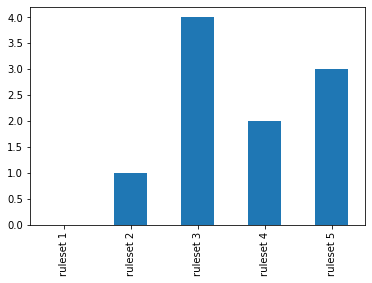

In [18]:
df.plot.bar()

v) Find outliers in sepal length using boxplot and boxplot.stats


<AxesSubplot:>

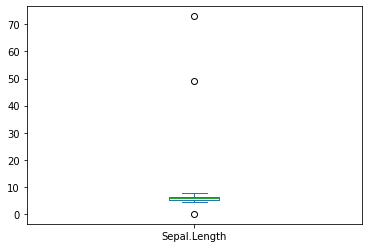

In [19]:
data['Sepal.Length'].plot.box()